### Apostador Tempest Hold'Em 

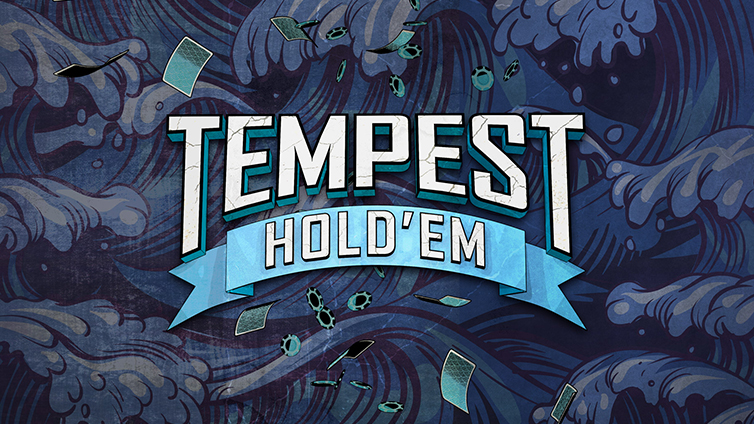

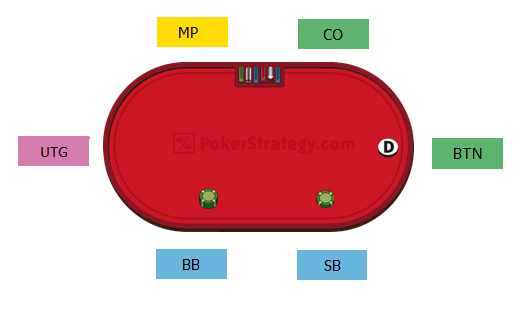

https://wizardofodds.com/games/texas-hold-em/6-player-game/

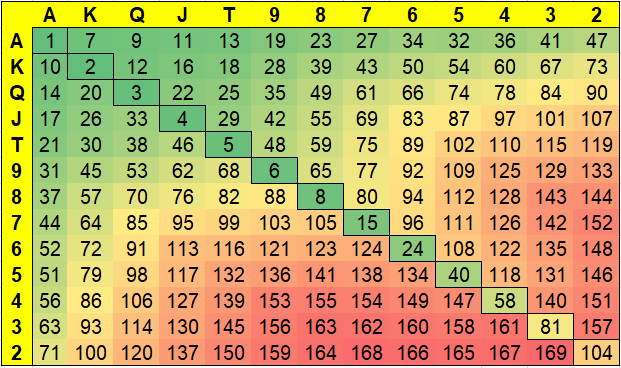

Como nodos se proponen: 
- distribución de probabilidad de cada mano (ya la tenemos teóricamente, pero demostrarla)
- Probabilidad de ganar con cada mano
- Probabilidad de ganar con cada mano en cada posición
- Mano con la que se gana normalmente

In [30]:
#!/usr/bin/env python
# -*- coding: latin-1 -*-

"""
The object of this project is to find out which specific hands, and under 
what circumstances it is ok to bet 'all-in' in a Tempest hold'em game.

The project starts by simulating different scenarios and finding out what 
hands are the most powerfull ones.  
"""


import time
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from holdem.deck import Deck
from holdem.card import Card
from holdem.evaluator import Evaluator
from init_rank import init_rank

initial_ranking = init_rank.initial_ranking
evaluator = Evaluator()

def game(nplayers, pretty_print = False):
    """
    Parameters
    ----------
    nplayers : int
        number of players in the simulated game.
    pretty_print : Boolean, optional
        It prints the game simulation. The default is False.

    Returns
    -------
    initial_rank : list
        initial ranking positions of the drawn hands    
    ranking : list
        global result ranking of each of the drawn hands. lower ranking means
        higher global hand (lowest rank is an imperial flush)
    """
    if len(constraints) != nplayers:
        constraints = np.ones(nplayers)
    deck = Deck()
    # Repartimos 2 cartas a cada jugador
    hands = [deck.draw(2) for _ in range(nplayers)]

    # Cada jugador decide si apuesta o no apuesta en base a su posicion y su mano inicial.
    initial_rank = [initial_ranking(hand) for hand in hands] # ranking inicial p/2 jugadores, seg�n Michael Shackleford.

    # Se reparte las 5 cartas comunes.
    board = deck.draw(5)


    if pretty_print:
        [Card.print_pretty_cards(i) for i in hands] # imprime la mano de cada jugador
        Card.print_pretty_cards(board) # imprime tablero
        evaluator.hand_summary(board, hands) # imprime ganador

    # Se calcula el ranking de cadfloat64a mano.
    ranking = [evaluator.evaluate(hand, board) for hand in hands]
    return([initial_rank, ranking])


def simulate_games(nplayers, simulations, print_simulations = False, save_file = ""):
    """
    Parameters
    ----------
    nplayers : int
        number of players per game simulation.
    simulations : int
        number of games simulated. 
    print_simulations : Boolean, optional
        Prints every simulated game. The default is False.
    save_file : str, optional
        If not-null, it saves the results in a .json
        Note: the format would be "filename.json". 
    The default is "" (null).

    Returns
    -------
    results : list
        list of games played. Each game has inside of it the initial hand
        ranking and the final global rank.

    """                 

    results = [game(nplayers, print_simulations) for _ in range(simulations)]

    if save_file:
        with open(save_file, "w") as write_file:
            json.dump(results, write_file)
            
    return results


def load_sim_json(filename, print_json = False):
    """
    Parameters
    ----------
    filename : str
        name of the file where results where previously storaged.
    print_json : Bool, optional
        prints what was storaged in the .json. The default is False.

    Returns
    -------
    data : list
        returns the results previously storaged in the json.

    """

    try:
        with open(filename,) as f:
            data = json.load(f)
        if print_json:
            print(data)
        return (data)
    except:
        pass
    
    print('no file with the specified name')


def local_ranking(results):
    """
    Parameters
    ----------
    results : list
        Dataset with initial hand ranking and the global hand ranking.

    Returns
    -------
    local_rankings : np.array
        Dataset with the hand ranking
        (from 0 - nplayers). being 0 the top hand and n the worst one. 

    """
    local_rankings = np.zeros((len(results),len(results[0][0])))
    for i in range(len(results)): 
        local_rankings[i,:] = np.argsort(results[i][1])
    
    return local_rankings


def linear(results):
    """
    Parameters
    ----------
    results : list
        A list with the simulated  and storaged games.

    Returns
    -------
    mat : np.array
        With al the results distributed in only 2 columns. They are no longer
        separated games, this only maps the initial hand and the final rank. 

    """
    nplayers = len(results[0][0])
    simulations = len(results)
    
    mat = np.zeros((nplayers*simulations, 2))
    cont = 0
    for i in results:
        mat[(cont)*nplayers : (cont+1)*nplayers, 0] = i[0][:]
        mat[(cont)*nplayers : (cont+1)*nplayers, 1] = i[1][:]
        cont += 1
    
    return mat


t1 = time.time()
nplayers = 6
simulations = 1
# filename = "simulations.json"

results = simulate_games(nplayers, simulations, print_simulations=True) #, save_file=filename) # for overwriting the file
# results = load_sim_json("simulations.json") # for loading the file

print(results)

 [2♣],[K♠] 
 [Q♦],[T♥] 
 [A♣],[4♠] 
 [J♣],[Q♥] 
 [5♠],[6♣] 
 [5♦],[2♠] 
 [J♠],[4♥],[K♣],[8♣],[7♠] 
========== FLOP ==========
Player 1 hand = Pair, percentage rank among all hands = 0.5068346287858483
Player 2 hand = High Card, percentage rank among all hands = 0.10439560439560436
Player 3 hand = Pair, percentage rank among all hands = 0.25931385687483244
Player 4 hand = Pair, percentage rank among all hands = 0.45765210399356737
Player 5 hand = High Card, percentage rank among all hands = 0.07906727418922543
Player 6 hand = High Card, percentage rank among all hands = 0.07812918788528544
Player 1 hand is currently winning.

========== TURN ==========
Player 1 hand = Pair, percentage rank among all hands = 0.5089788260519967
Player 2 hand = High Card, percentage rank among all hands = 0.10493165371214153
Player 3 hand = Pair, percentage rank among all hands = 0.25931385687483244
Player 4 hand = Pair, percentage rank among all hands = 0.45818815331010454
Player 5 hand = High Card, perce

In [31]:
nplayers = 6
simulations = 100
# filename = "simulations.json"

results = simulate_games(nplayers, simulations) #, save_file=filename) # for overwriting the file
results

[[[5, 11, 111, 92, 44, 100], [2968, 5107, 1606, 2183, 5126, 3250]],
 [[129, 86, 120, 37, 134, 15], [5818, 3697, 6022, 6273, 6918, 2085]],
 [[164, 169, 12, 113, 31, 139], [2407, 2409, 5966, 3249, 2593, 3304]],
 [[35, 15, 113, 79, 117, 117], [2755, 3096, 4701, 2645, 4701, 4701]],
 [[105, 150, 84, 82, 128, 165], [6903, 3008, 6732, 4286, 6908, 3283]],
 [[57, 125, 138, 130, 38, 149], [3602, 4481, 5361, 4042, 1601, 6688]],
 [[153, 116, 143, 38, 97, 142], [2569, 3429, 3443, 3381, 2497, 3448]],
 [[93, 95, 132, 167, 59, 44], [6743, 7035, 7092, 6081, 4754, 6414]],
 [[10, 56, 91, 167, 103, 136], [5967, 3304, 6066, 321, 6102, 6102]],
 [[108, 166, 154, 33, 156, 143], [7020, 7020, 3185, 2723, 7008, 7014]],
 [[130, 17, 164, 149, 123, 116], [6245, 3338, 4650, 1606, 4650, 6273]],
 [[113, 103, 43, 57, 67, 46], [5222, 1604, 1040, 4718, 6883, 1379]],
 [[105, 53, 79, 139, 71, 123], [3023, 1963, 4507, 3066, 4463, 3024]],
 [[134, 107, 95, 72, 25, 131], [3557, 2611, 2611, 1677, 1600, 3557]],
 [[122, 35, 100, 

In [32]:
results = load_sim_json("simulations.json")

In [35]:
local_ranking(results)

array([[0., 3., 4., ..., 2., 6., 5.],
       [1., 2., 5., ..., 4., 8., 7.],
       [5., 6., 3., ..., 8., 7., 0.],
       ...,
       [4., 5., 3., ..., 1., 0., 8.],
       [4., 6., 8., ..., 7., 0., 3.],
       [2., 1., 4., ..., 6., 0., 5.]])

## Se jugará bajo el supuesto de que algunos jugadores tienen un rango definido de apuesta

For this exercise we will consider the following order: 
   - 1: small blind
   - 2: big blind
   - 3: under the gun
   - 4: middle position
   - 5: cut-off
   - 6: button

In this game (different to other versions) there are 3 blinds which are paid in the following order: 
   - 1: 1000 (by sb)
   - 2: 500 (by bb)
   - 3: 200 (by utg)
        
    plus a $200 ante (amount paid by everyone)
    
One of the assumptions for the simulation of this game is that there will be no turns, everyone must submit at the same time the information of wheter they are betting or not. 

In [56]:
def constraint_game(nplayers, constraints, pretty_print = False):
    """
    Parameters
    ----------
    nplayers : int
        number of players in the simulated game.
    pretty_print : Boolean, optional
        It prints the game simulation. The default is False.

    Returns
    -------
    initial_rank : list
        initial ranking positions of the drawn hands    
    ranking : list
        global result ranking of each of the drawn hands. lower ranking means
        higher global hand (lowest rank is an imperial flush)
    """
    if len(constraints) != nplayers:
        constraints = np.ones(nplayers)
        
    deck = Deck()
    # Repartimos 2 cartas a cada jugador
    hands = [deck.draw(2) for _ in range(nplayers)]

    # Cada jugador decide si apuesta o no apuesta en base a su posicion y su mano inicial.
    initial_rank = np.array([initial_ranking(hand) for hand in hands]) # ranking inicial p/2 jugadores, seg�n Michael Shackleford.

    # Revisa quienes no apuestan
    doesnt_bet = initial_rank > constraints
    
    # Se reparte las 5 cartas comunes.
    board = deck.draw(5)


    if pretty_print:
        [Card.print_pretty_cards(i) for i in hands] # imprime la mano de cada jugador
        Card.print_pretty_cards(board) # imprime tablero
        evaluator.hand_summary(board, hands) # imprime ganador

    # Se calcula el ranking de cadfloat64a mano.
    ranking = np.array([evaluator.evaluate(hand, board) for hand in hands])
    income = ranking.copy()
    income[doesnt_bet] = 7415
    
    return([initial_rank, ranking, income])


In [57]:
# quienes no apuestan tienen un 7415.
constraints = [70,80,90,100,110,120]
constraint_game(6, constraints)

[array([168, 141,  58, 156,  67, 159]),
 array([6471, 6470, 5545, 3073, 5747, 4445]),
 array([7415, 7415, 5545, 7415, 5747, 7415])]

In [41]:
np.ones(nplayers)

array([1., 1., 1., 1., 1., 1.])

In [43]:
linear(results).max(axis=0)

array([ 169., 7414.])